In [2]:
import math

import numpy as np
import pandas as pd
import matplotlib. pyplot as plt

from okama.assets import Asset, AssetList, Portfolio
from okama.frontier import EfficientFrontier, EfficientFrontierReb, Plots
from okama.helpers import Frame
%load_ext autoreload
%autoreload 2

SBSP.MCX
VTBA.MCX
AKSP.MCX

### Assets

In [8]:
a = Asset('AKSP.MCX')

In [9]:
a.ror

Date
2019-04    0.017034
2019-05   -0.056158
2019-06    0.056367
2019-07    0.028656
2019-08   -0.030740
2019-09    0.006938
2019-10    0.024606
2019-11    0.038425
2019-12    0.032377
2020-01   -0.003584
2020-02   -0.090827
2020-03   -0.100890
2020-04   -0.052805
Freq: M, Name: AKSP.MCX, dtype: float64

In [4]:
a.asset_currency

'RUB'

In [4]:
a.market

'US'

In [5]:
a.ror

Date
1993-02    0.010668
1993-03    0.022386
1993-04   -0.025565
1993-05    0.026961
1993-06    0.003590
             ...   
2019-10    0.022105
2019-11    0.036198
2019-12    0.029055
2020-01   -0.000404
2020-02    0.036521
Freq: M, Name: SPY.US, Length: 325, dtype: float64

In [6]:
a.ticker

'SPY.US'

### Asset lists

In [3]:
ls = ['IRAO.MCX']
x = AssetList(symbols=ls, curr='RUB', first_date='2019-01', last_date='2020-01')

Exception: Zero close values in data

In [9]:
x.ror

,SPY.US,BND.US
Date,,
2019-01,0.013013,-0.051663
2019-02,0.041621,0.008007
2019-03,0.013703,0.014986
2019-04,0.023866,-0.016547
2019-05,-0.051796,0.031288
2019-06,0.034207,-0.021021
2019-07,0.021357,0.007654
2019-08,0.030342,0.076905
2019-09,-0.009327,-0.033748


In [78]:
x.get_var_historic()

SPY.US      0.026641
GAZP.MCX    0.081732
Name: 0.05, dtype: float64

In [74]:
Frame.get_cvar_historic(x.ror)

SPY.US    0.051796
dtype: float64

In [79]:
x.get_cvar_historic(5)

SPY.US      0.051796
GAZP.MCX    0.115835
dtype: float64

In [52]:
x.mean_return_annual

0.1564905544168027

In [50]:
x.cagr.sum()

0.2754481254027452

In [45]:
x.semideviation.sum()

0.05592602298844028

In [46]:
x.drawdowns.min().sum()

-0.1798727778213174

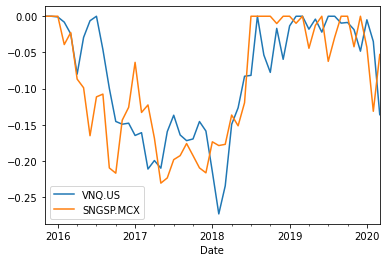

In [16]:
Frame.get_drawdowns(x.ror).plot()

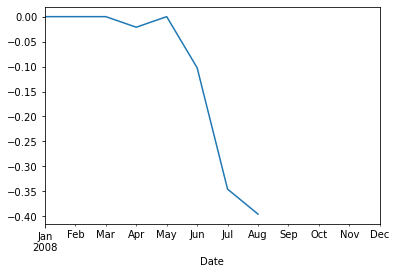

In [25]:
Frame.drawdowns(x.ror['SNGSP.MCX']['2008']).plot()

In [63]:
x = AssetList(symbols=['SPY.US', 'GAZP.MCX'], curr='RUB', first_date='2019-01', last_date='2020-01')

In [20]:
x.last_date

Timestamp('2020-01-01 00:00:00')

### Portfolio

In [2]:
y = Portfolio(first_date='11.12.2013', last_date='20.09.2019')

In [3]:
y.tickers

['SPY.US']

In [9]:
y.cagr

0.11461792102029555

In [5]:
z = Portfolio(['SPY.US', 'BND.US'], first_date='11.12.2013', last_date='20.09.2019')

In [10]:
z.mean_return_annual

0.0776055701656384

In [11]:
z.cagr

0.0759039708592788

In [2]:
ls = ['VNQ.US', 'SPY.US', 'GLD.US']
x = Portfolio(symbols=ls, curr='USD')

In [3]:
x.weights

[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]

In [4]:
x.mean_return_monthly

0.007437996761437166

In [5]:
x.mean_return_annual

0.09299939451412209

In [7]:
x.risk_monthly

0.04356365834071058

In [8]:
x.risk_annual

0.17328436789926255

In [9]:
x.get_rebalanced_portfolio_return_ts().mean()

0.010292714584833771

In [12]:
x.get_rebalanced_portfolio_return_ts(period="N").mean()

0.010525105802228808

In [13]:
x.get_rebalanced_portfolio_return_ts().mean()

0.010292714584833771

In [106]:
x.returns_ts.rolling(12).apply(lambda x: (x + 1.).prod() - 1.).dropna()

Date
2005-08    0.266501
2005-09    0.273273
2005-10    0.170261
2005-11    0.172529
2005-12    0.120524
             ...   
2019-11    0.177554
2019-12    0.289110
2020-01    0.166648
2020-02    0.077182
2020-03   -0.220031
Freq: M, Length: 176, dtype: float64

In [107]:
x.returns_ts.rolling(12).apply(Frame.get_cagr).dropna()

Date
2005-08    0.266501
2005-09    0.273273
2005-10    0.170261
2005-11    0.172529
2005-12    0.120524
             ...   
2019-11    0.177554
2019-12    0.289110
2020-01    0.166648
2020-02    0.077182
2020-03   -0.220031
Freq: M, Length: 176, dtype: float64

In [108]:
Frame.get_var_historic(y, 5)

0.37358199289282495

In [111]:
x.get_var_historic()

0.18552409305746437

In [112]:
x.get_cvar_historic()

0.280605336207679

#### Скорость и точность вычисления средней доходности

In [42]:
%%timeit
x.mean_return_monthly # через ковариацию

709 µs ± 16.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [43]:
%%timeit
x.returns_ts.mean() # через статистические данные (медленно?)

308 µs ± 20.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [44]:
%%timeit
x.get_rebalanced_portfolio_return_ts().mean() # портфель с реблансировкой (еще медленне)

27.4 ms ± 2.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [33]:
x.mean_return_monthly == x.returns_ts.mean()

True

In [34]:
x.mean_return_monthly

0.012178819876164489

In [35]:
x.returns_ts.mean()

0.012178819876164489